In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout, SpatialDropout2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.utils import to_categorical
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [2]:
data = np.load("coins.npz")
x_train = data['x_train']
x_val = data['x_val']
x_test = data['x_test']
y_train = to_categorical(data['y_train'])
y_val = to_categorical(data['y_val'])
y_test = to_categorical(data['y_test'])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


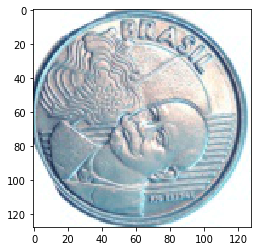

In [3]:
print(y_train[1])
plt.imshow(x_train[1])
plt.show()

## Arquitetura da rede

In [4]:
entrada = Input(shape=(x_train.shape[1:]))
conv1 = Conv2D(32, 3, activation='relu')(entrada)
max1 = MaxPooling2D()(conv1)
conv_drop1 = SpatialDropout2D(0.025)(max1)
conv2 = Conv2D(64, 3, activation='relu')(conv_drop1)
max2 = MaxPooling2D()(conv2)
conv_drop2 = SpatialDropout2D(0.05)(max2)
conv3 = Conv2D(128, 3, activation='relu')(conv_drop2)
max3 = MaxPooling2D()(conv3)
conv_drop3 = SpatialDropout2D(0.1)(max3)
flatten = Flatten()(conv_drop3)
densa1 = Dense(512, activation='relu')(flatten)
densa_drop1 = Dropout(0.1)(densa1)
densa2 = Dense(512, activation='relu')(densa_drop1)
densa_drop2 = Dropout(0.1)(densa2)
saida = Dense(18, activation='softmax')(densa_drop2)

W0925 11:59:31.636233  8324 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0925 11:59:31.708244  8324 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0925 11:59:31.716246  8324 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0925 11:59:31.788267  8324 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0925 11:59:31.824273  8324 deprecation

In [5]:
model = Model(entrada, saida)
type(model)

keras.engine.training.Model

In [6]:
sgd = SGD(lr = 0.0001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0925 11:59:32.697125  8324 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0925 11:59:32.741504  8324 deprecation_wrapper.py:119] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Treinamento da Rede

In [7]:
batch = 32
epochs = 150

In [8]:
model_checkpoint = ModelCheckpoint("coinnet_epoch_{epoch:02d}.hdf5", save_best_only=True)

In [9]:
history = model.fit(x=x_train, y=y_train, batch_size=batch, epochs=epochs, validation_data=(x_val,y_val), callbacks=[model_checkpoint])

W0925 11:59:33.573187  8324 deprecation.py:323] From C:\Users\giova\Anaconda3\envs\cnns\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3834 samples, validate on 1826 samples
Epoch 1/150
3834/3834 [==============================] - 281s 73ms/step - loss: 14.7142 - acc: 0.0605 - val_loss: 13.1118 - val_acc: 0.0597
Epoch 2/150
3834/3834 [==============================] - 192s 50ms/step - loss: 8.2896 - acc: 0.1127 - val_loss: 1.8799 - val_acc: 0.3647
Epoch 3/150
3834/3834 [==============================] - 178s 47ms/step - loss: 2.5343 - acc: 0.2611 - val_loss: 1.4139 - val_acc: 0.5865
Epoch 4/150
3834/3834 [==============================] - 180s 47ms/step - loss: 2.0484 - acc: 0.3466 - val_loss: 1.1268 - val_acc: 0.6813
Epoch 5/150
3834/3834 [==============================] - 181s 47ms/step - loss: 1.7331 - acc: 0.4152 - val_loss: 0.8970 - val_acc: 0.7930
Epoch 6/150
3834/3834 [==============================] - 182s 47ms/step - loss: 1.4864 - acc: 0.5029 - val_loss: 0.7099 - val_acc: 0.8560
Epoch 7/150
3834/3834 [==============================] - 179s 47ms/step - loss: 1.3427 - acc: 0.5428 - val_loss: 0.5659 - 

KeyboardInterrupt: 

## Validação do Aprendizado

In [10]:
train_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])
plt.plot(range(train_loss.shape[0]), train_loss, 'r')
plt.plot(range(val_loss.shape[0]), val_loss, 'b')

NameError: name 'history' is not defined

In [ ]:
predicoes = model.predict(x_test)
np.argmax(predicoes[:5], axis=1)

In [ ]:
print(classification_report(np.argmax(y_test, axis = 1), np.argmax(predicoes, axis=1)))

In [ ]:
matriz_confusao = confusion_matrix(np.argmax(y_test, axis = 1), np.argmax(predicoes, axis=1))
print(matriz_confusao)

In [ ]:
scores = model.evaluate(x_train, y_train, verbose = 0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))